# Import the Libraries

In [1]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy import * 
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
dataset_path = 'UCF50/UCF50/'

all_class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
all_class_names.sort()

print(f"Total number of classes: {len(all_class_names)}\n")
print("Class names:")
for cls in all_class_names:
    print(f"  - {cls}")

print("\n Number of videos per class:")
total_videos = 0
for cls in all_class_names:
    class_folder = os.path.join(dataset_path, cls)
    video_files = [f for f in os.listdir(class_folder) if f.endswith('.avi')]
    print(f"{cls:25s}: {len(video_files)} videos")
    total_videos += len(video_files)

print(f"\n Total number of videos in dataset: {total_videos}")


🔹 Total number of classes: 50

🔹 Class names:
  - BaseballPitch
  - Basketball
  - BenchPress
  - Biking
  - Billiards
  - BreastStroke
  - CleanAndJerk
  - Diving
  - Drumming
  - Fencing
  - GolfSwing
  - HighJump
  - HorseRace
  - HorseRiding
  - HulaHoop
  - JavelinThrow
  - JugglingBalls
  - JumpRope
  - JumpingJack
  - Kayaking
  - Lunges
  - MilitaryParade
  - Mixing
  - Nunchucks
  - PizzaTossing
  - PlayingGuitar
  - PlayingPiano
  - PlayingTabla
  - PlayingViolin
  - PoleVault
  - PommelHorse
  - PullUps
  - Punch
  - PushUps
  - RockClimbingIndoor
  - RopeClimbing
  - Rowing
  - SalsaSpin
  - SkateBoarding
  - Skiing
  - Skijet
  - SoccerJuggling
  - Swing
  - TaiChi
  - TennisSwing
  - ThrowDiscus
  - TrampolineJumping
  - VolleyballSpiking
  - WalkingWithDog
  - YoYo

🔹 Number of videos per class:
BaseballPitch            : 150 videos
Basketball               : 137 videos
BenchPress               : 160 videos
Biking                   : 145 videos
Billiards                :

In [32]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy'), label='Val Accuracy', linestyle='--')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history.get('val_loss'), label='Val Loss', linestyle='--')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

features_train, features_val, labels_train, labels_val = train_test_split(
    features_train,  
    labels_train,    
    test_size=0.2,  
    random_state=42, 
    stratify=labels_train  
)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.2641 - loss: 1.3865 - val_accuracy: 0.3425 - val_loss: 1.3767
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.3181 - loss: 1.3534 - val_accuracy: 0.4384 - val_loss: 1.2743
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 244s 13s/step - accuracy: 0.4975 - loss: 1.1984 - val_accuracy: 0.2740 - val_loss: 1.4101
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 859ms/step - accuracy: 0.5099 - loss: 1.1799 - val_accuracy: 0.4384 - val_loss: 1.2686
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 743ms/step - accuracy: 0.5945 - loss: 1.0052 - val_accuracy: 0.3425 - val_loss: 1.4514
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 546ms/step - accuracy: 0.6323 - loss: 0.9419 - val_accuracy: 0.4247 - val_loss: 1.2725
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 612ms/step - accuracy: 0.7185 - loss: 0.8403 - val_accuracy: 0.4247 - val_loss: 1.3554
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 606ms/step - accuracy: 0.6970 - loss: 0.7630 - val_accuracy: 

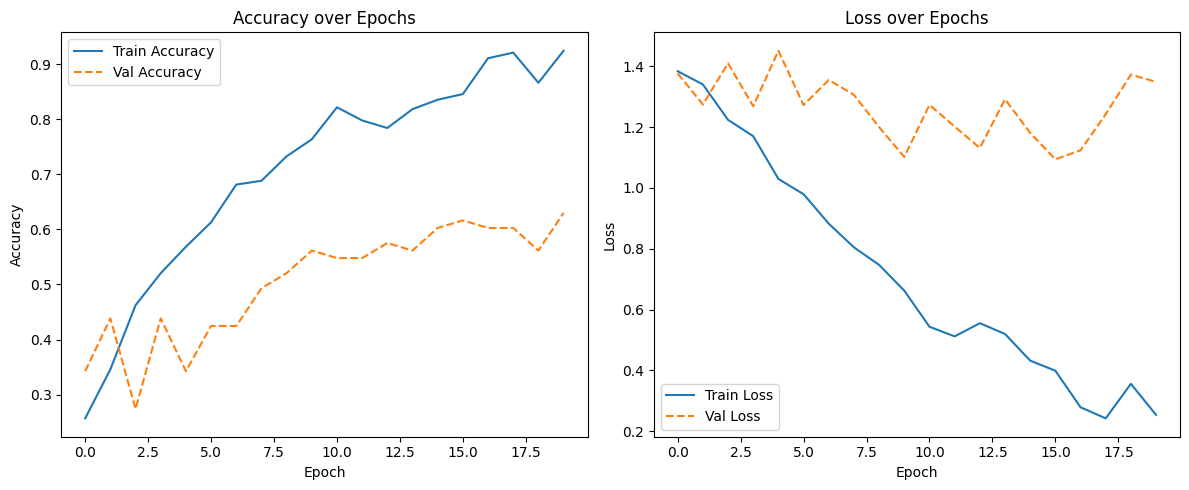

In [39]:
history = convlstm_model.fit(
    features_train,
    labels_train,
    validation_data=(features_val, labels_val),
    epochs=20,
    batch_size=16
)

plot_training_history(history)


C:\Users\mahes\AppData\Local\Temp\ipykernel_26652\3873438261.py:20: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


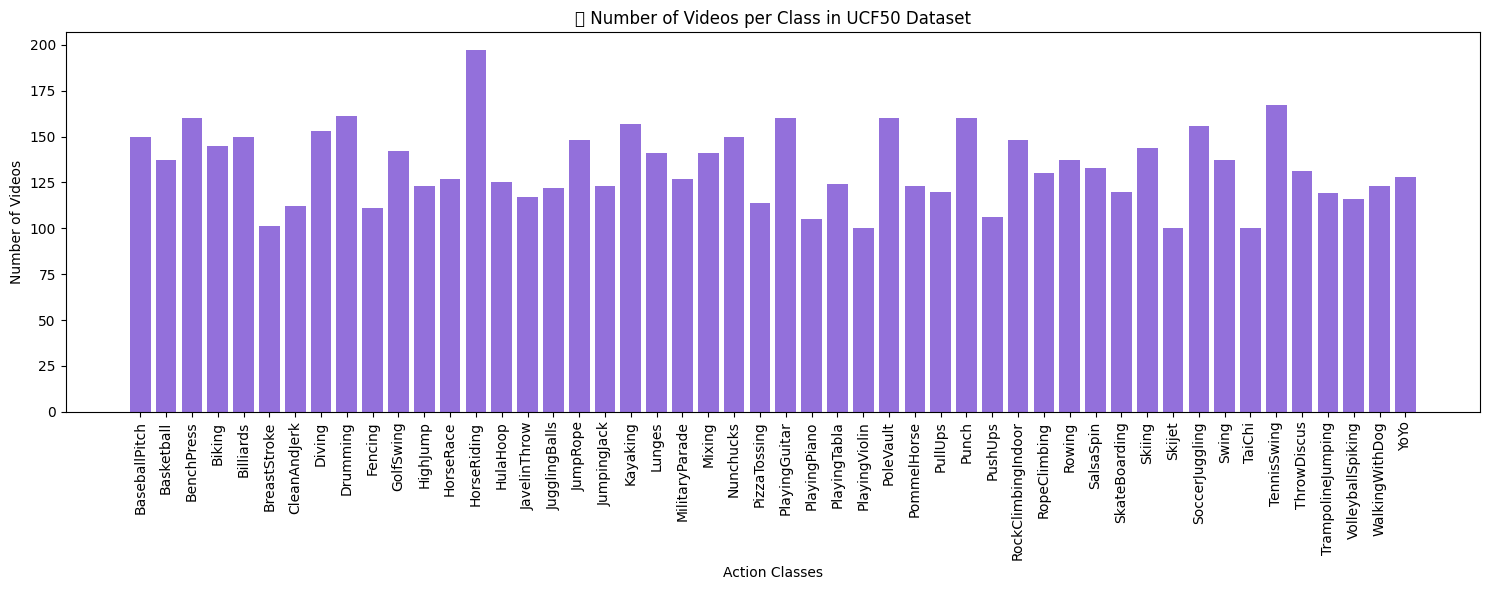

In [41]:
import os
import matplotlib.pyplot as plt

def plot(dataset_path):
    class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    class_names.sort()
    
    video_counts = []
    for cls in class_names:
        class_path = os.path.join(dataset_path, cls)
        video_files = [f for f in os.listdir(class_path) if f.endswith('.avi')]
        video_counts.append(len(video_files))

    plt.figure(figsize=(15, 6))
    plt.bar(class_names, video_counts, color='mediumpurple')
    plt.xticks(rotation=90)
    plt.title('🎬 Number of Videos per Class in UCF50 Dataset')
    plt.xlabel('Action Classes')
    plt.ylabel('Number of Videos')
    plt.tight_layout()
    plt.show()

plot('UCF50/UCF50/')


## Visualize the Data with its Labels

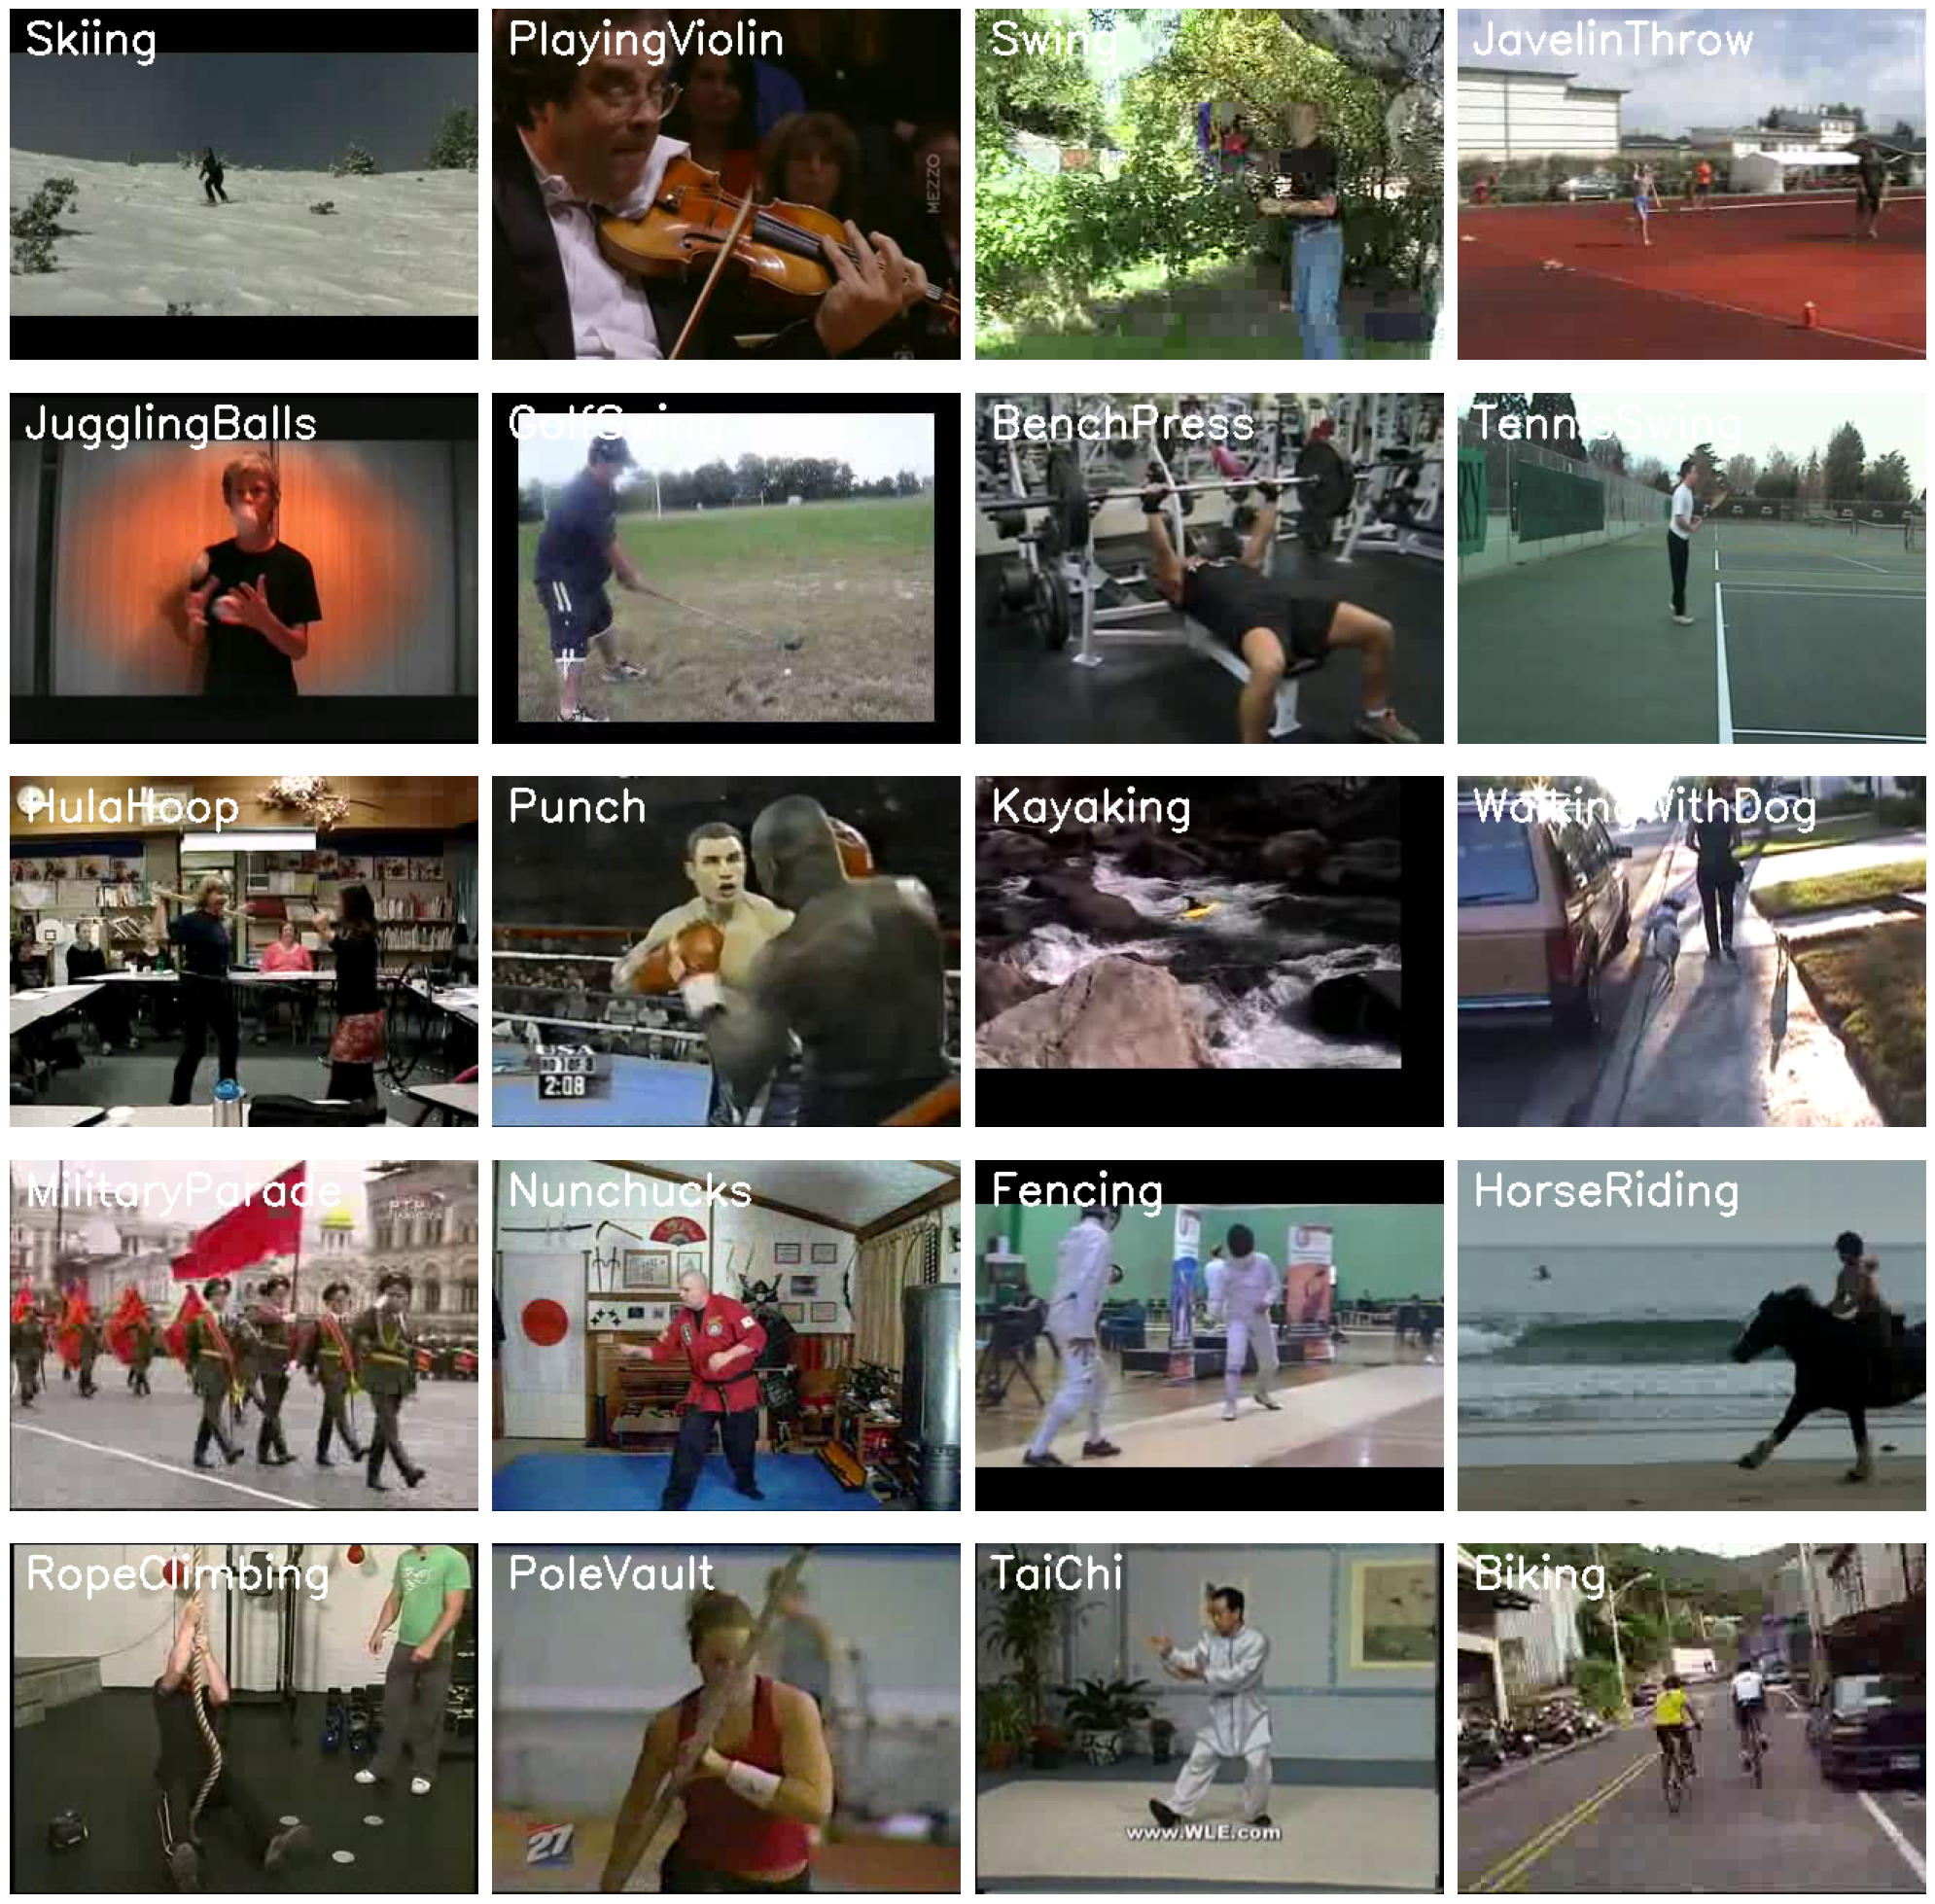

In [3]:
plt.figure(figsize=(20, 20))

all_classes_names = os.listdir('UCF50/UCF50/')
num_classes = len(all_classes_names)
num_samples_to_display = min(20, num_classes)

random_range = random.sample(range(num_classes), num_samples_to_display)

for counter, random_index in enumerate(random_range, 1):
    class_Name = all_classes_names[random_index]
    video_files_names_list = os.listdir(f'UCF50/UCF50/{class_Name}')
    selected_video_file_name = random.choice(video_files_names_list)
    video_path = f'UCF50/UCF50/{class_Name}/{selected_video_file_name}'
    video_reader = cv2.VideoCapture(video_path)

    ret, bgr_frame = video_reader.read()
    if ret: 
        video_reader.release()
        rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
        cv2.putText(rgb_frame, class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        plt.subplot(5, 4, counter)
        plt.imshow(rgb_frame)
        plt.axis('off')
    else:
        print(f"Error reading frame from: {video_path}")
        video_reader.release()
        plt.subplot(5, 4, counter)
        plt.text(0.5, 0.5, f"Failed to load\n{class_Name}", ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Preprocess the Dataset

In [4]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20
DATASET_DIR = "UCF50"
CLASSES_LIST = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]

## Extract, Resize & Normalize Frames

In [ ]:
def frames_extraction(video_path):
    
    frames_list = []
    
    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read() 

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        normalized_frame = resized_frame / 255
        
        frames_list.append(normalized_frame)

    video_reader.release()

    return frames_list

In [6]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []
    DATASET_DIR = 'UCF50/UCF50'  
    
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        print(f'Extracting Data of Class: {class_name}')
        
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        for file_name in files_list:
            
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:

                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)  
    
    return features, labels, video_files_paths

In [7]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: TaiChi
Extracting Data of Class: Swing
Extracting Data of Class: HorseRace


In [8]:
one_hot_encoded_labels = to_categorical(labels)

## Split the Data into Train and Test Set

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

In [11]:
def create_convlstm_model():

    model = Sequential()

    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))


    model.summary()

    return model

In [15]:
convlstm_model = create_convlstm_model()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_4 (ConvLSTM2D)      │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_5 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_6 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_7 (ConvLSTM2D)      │ (None, 20, 5, 5, 16)   │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 20, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │        11,524 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,524 (173.92 KB)

 Trainable params: 44,524 (173.92 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
plot_model(convlstm_model, to_file='convlstm_model_structure_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Compile & Train the Model

In [14]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 337ms/step - accuracy: 0.2261 - loss: 1.3956 - val_accuracy: 0.4384 - val_loss: 1.3579
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.3424 - loss: 1.3142 - val_accuracy: 0.5342 - val_loss: 1.1169
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.5125 - loss: 1.0894 - val_accuracy: 0.5616 - val_loss: 0.9821
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.6363 - loss: 0.8789 - val_accuracy: 0.6986 - val_loss: 0.7690
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.6632 - loss: 0.8185 - val_accuracy: 0.6849 - val_loss: 0.8148
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 27s 366ms/step - accuracy: 0.7116 - loss: 0.7218 - val_accuracy: 0.5616 - val_loss: 1.0322
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.7213 - loss: 0.6469 - val_accuracy: 0.4932 - val_loss: 1.2790
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.7697 - loss: 0.5573 - val_accura

## Evaluate the Trained Model

In [ ]:
convlstm_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 468ms/step - accuracy: 0.3929 - loss: 1.3841


## Plot Model’s Loss & Accuracy Curves

In [21]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))

    plt.legend()

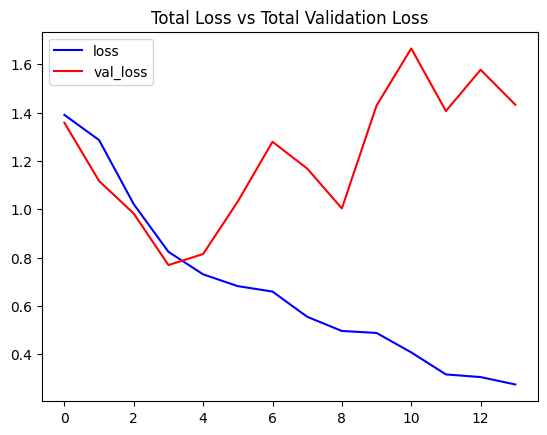

In [22]:
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

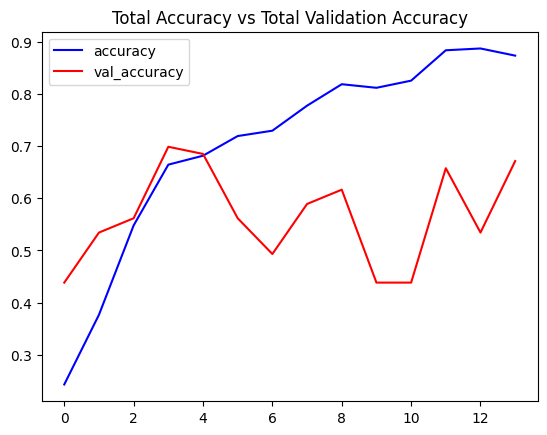

In [23]:
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [24]:
def create_LRCN_model():

    model = Sequential()
    
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    model.summary()
    
    return model

In [25]:
LRCN_model = create_LRCN_model()

c:\Users\mahes\OneDrive\Desktop\Genai_Project\.venv\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_6              │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 20, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 20, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,060 (285.39 KB)

 Trainable params: 73,060 (285.39 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [43]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 57s 360ms/step - accuracy: 0.2391 - loss: 1.4091 - val_accuracy: 0.3559 - val_loss: 1.3680
Epoch 2/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 326ms/step - accuracy: 0.3132 - loss: 1.3770 - val_accuracy: 0.4407 - val_loss: 1.3312
Epoch 3/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 317ms/step - accuracy: 0.3319 - loss: 1.3516 - val_accuracy: 0.4915 - val_loss: 1.2711
Epoch 4/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 24s 415ms/step - accuracy: 0.3473 - loss: 1.3203 - val_accuracy: 0.3051 - val_loss: 1.3740
Epoch 5/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.3854 - loss: 1.3358 - val_accuracy: 0.5424 - val_loss: 1.1902
Epoch 6/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.4984 - loss: 1.1445 - val_accuracy: 0.5932 - val_loss: 1.0290
Epoch 7/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.5081 - loss: 1.1368 - val_accuracy: 0.6271 - val_loss: 1.0131
Epoch 8/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.5648 - loss: 1.0529 - val_accu

In [44]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8676 - loss: 0.5490


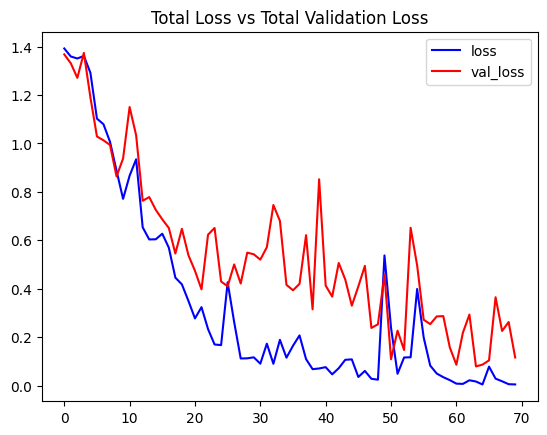

In [45]:
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

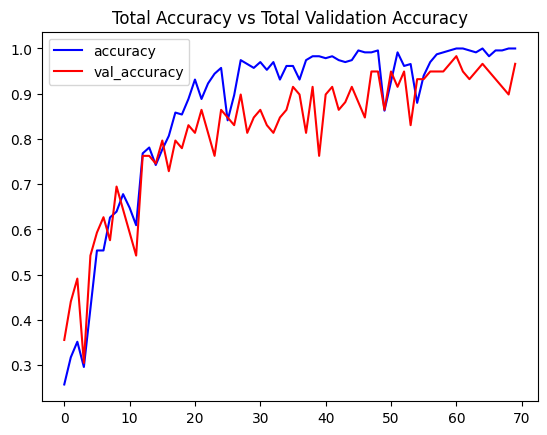

In [46]:
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

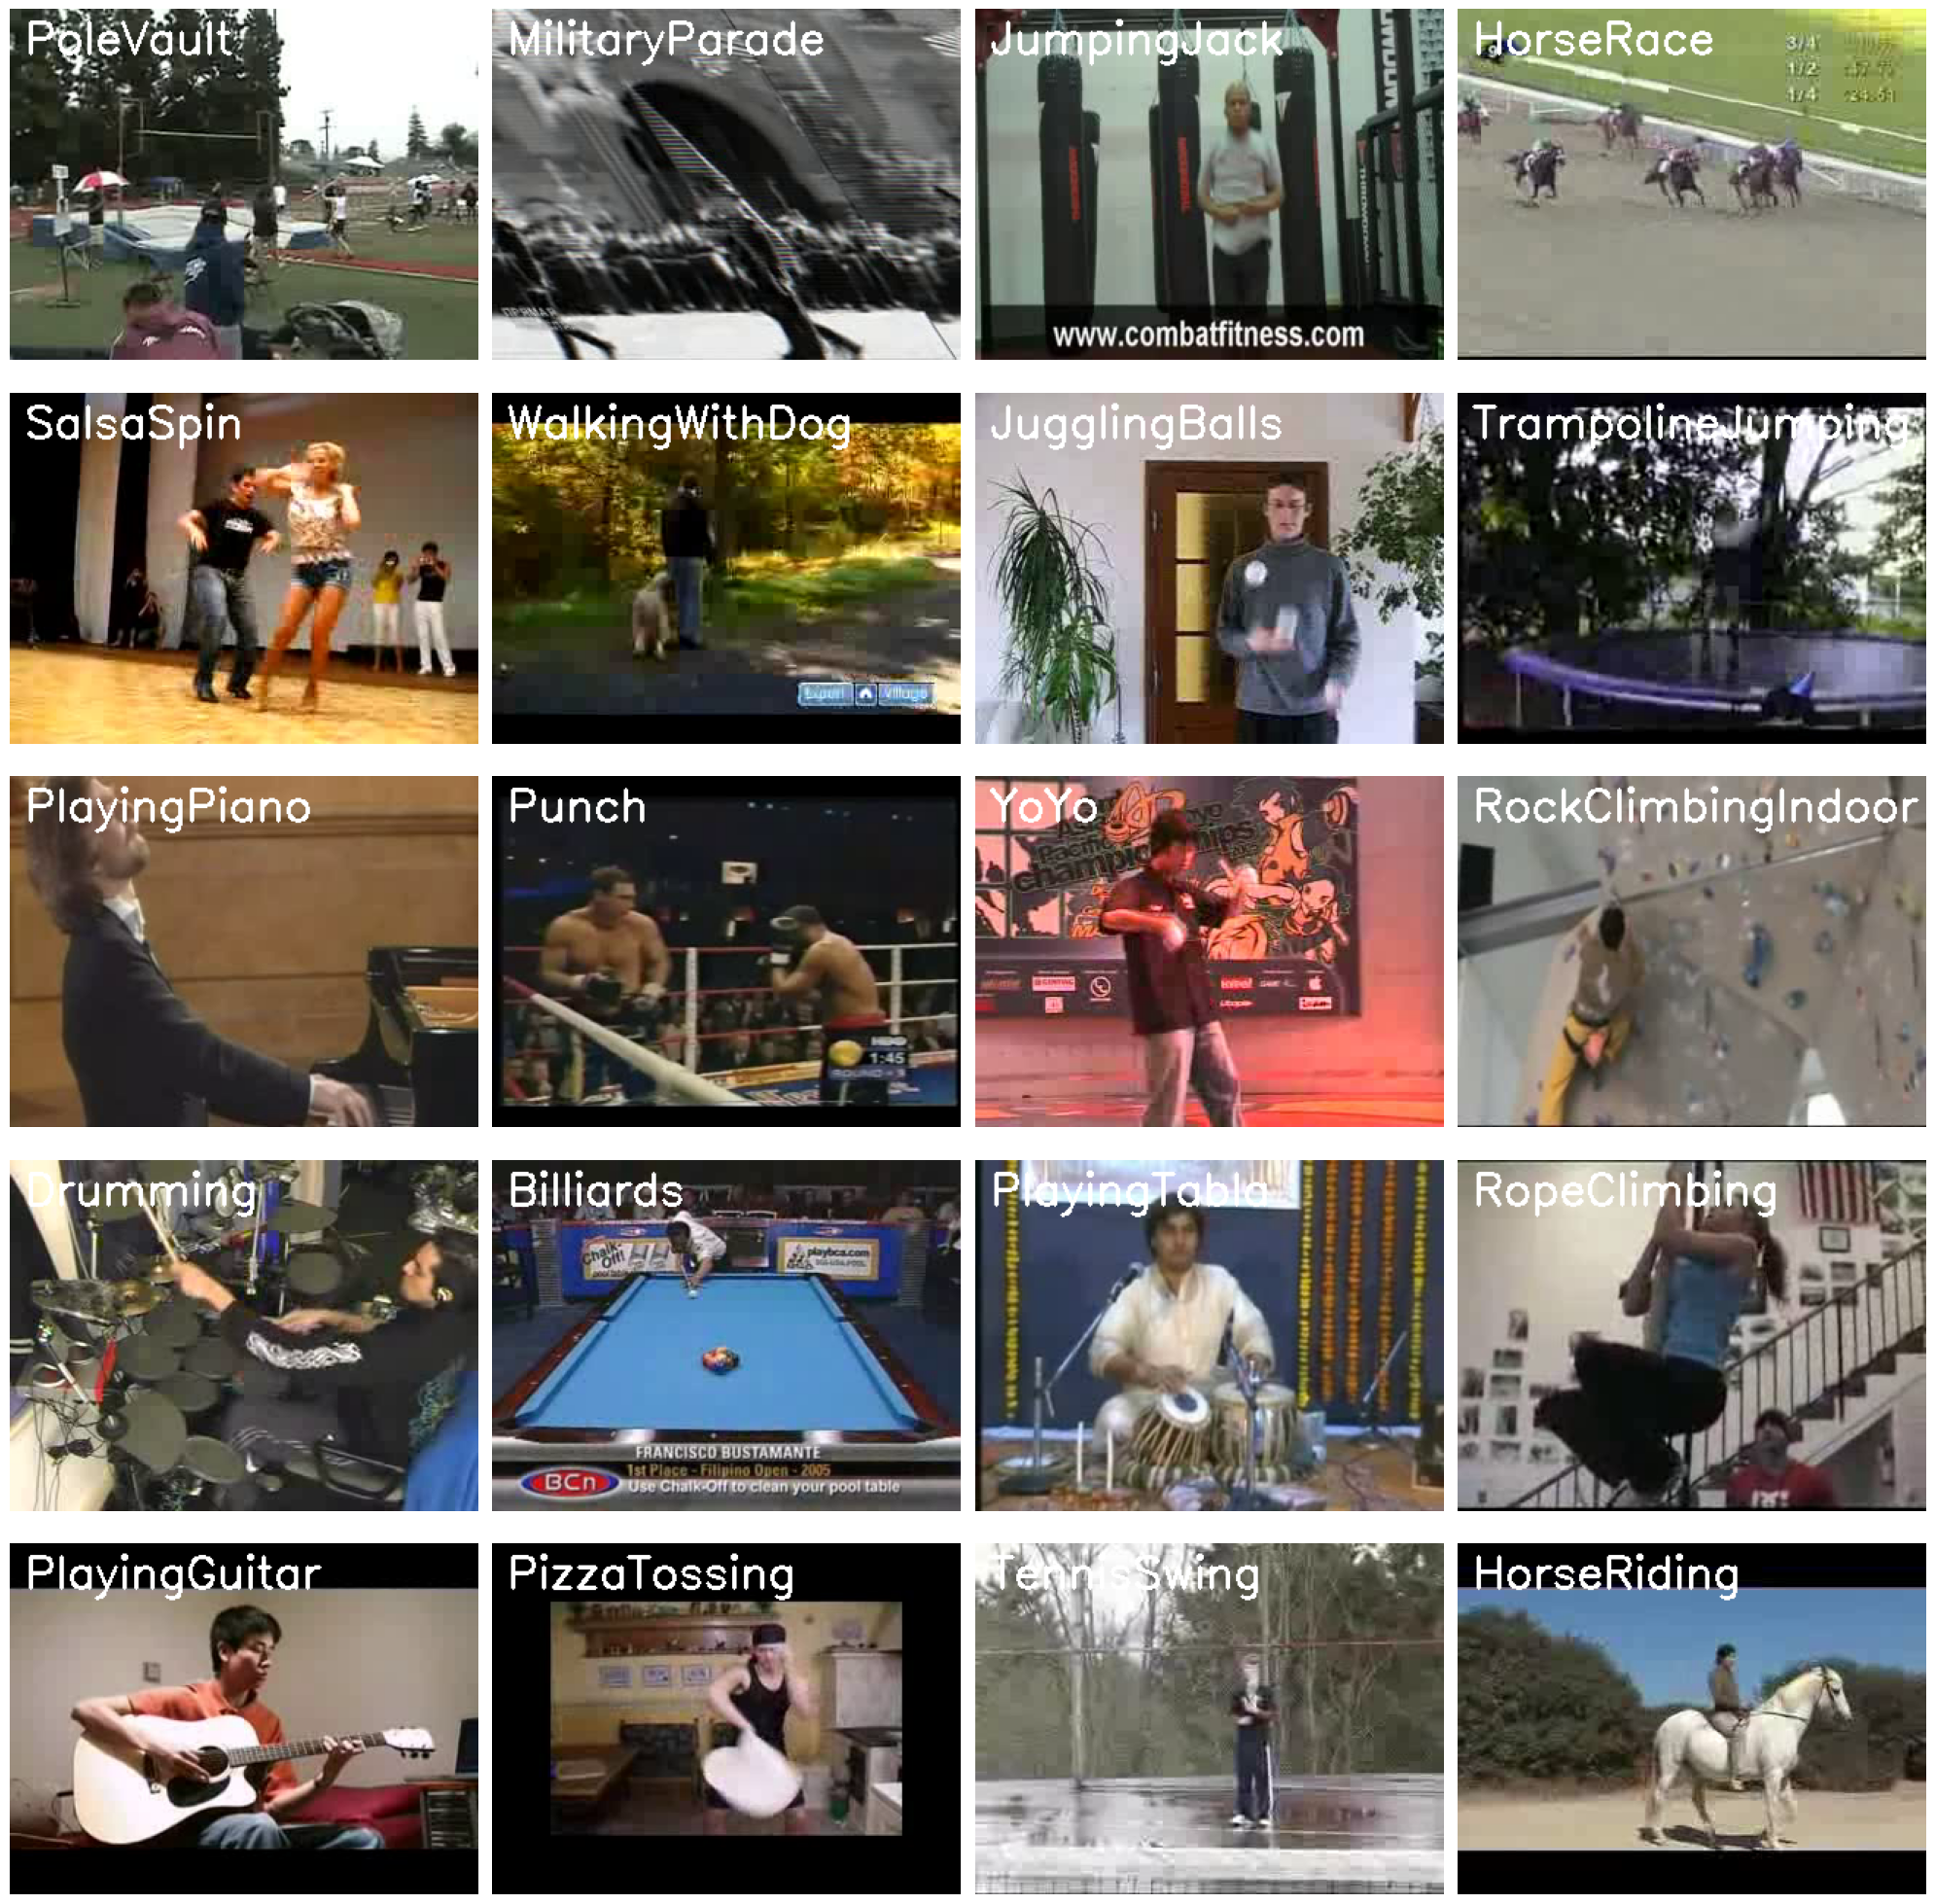

In [57]:
plt.figure(figsize=(20, 20))

all_classes_names = os.listdir('UCF50/UCF50/')
num_classes = len(all_classes_names)
num_samples_to_display = min(20, num_classes)

random_range = random.sample(range(num_classes), num_samples_to_display)

for counter, random_index in enumerate(random_range, 1):
    class_Name = all_classes_names[random_index]
    video_files_names_list = os.listdir(f'UCF50/UCF50/{class_Name}')
    selected_video_file_name = random.choice(video_files_names_list)
    video_path = f'UCF50/UCF50/{class_Name}/{selected_video_file_name}'
    video_reader = cv2.VideoCapture(video_path)

    ret, bgr_frame = video_reader.read()
    if ret: 
        video_reader.release()
        rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
        cv2.putText(rgb_frame, class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        plt.subplot(5, 4, counter)
        plt.imshow(rgb_frame)
        plt.axis('off')
    else:
        print(f"Error reading frame from: {video_path}")
        video_reader.release()
        plt.subplot(5, 4, counter)
        plt.text(0.5, 0.5, f"Failed to load\n{class_Name}", ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()  